In [1]:
import sys; sys.path.append('..')
import inflation, mesh, sheet_meshing
from tri_mesh_viewer import TriMeshViewer as Viewer
import triangulation
import numpy as np
import utils, py_newton_optimizer, benchmark

In [2]:
  V, E = mesh.load_raw('data/ForwardDesign/hinge3.obj')
  fusedPts = list(np.loadtxt('data/ForwardDesign/fusehinge3.txt').reshape((-1, 2)))
  holePts = []  # or load from file if you want, but it should be empty

In [3]:
m, iwv, iwbv = sheet_meshing.forward_design_mesh(V, E, fusedPts, holePts, np.prod(utils.bbox_dims(V)[0:2]) / 1e4)
isheet = inflation.InflatableSheet(m, iwv)

Renderer(camera=PerspectiveCamera(children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0), quaternion=(…

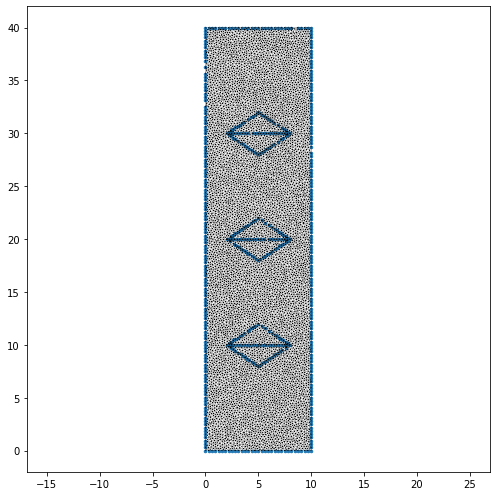

In [4]:
import visualization
visualization.plot_2d_mesh(m, pointList=np.where(iwv))

viewer = Viewer(isheet, wireframe=True)
viewer.show()

In [5]:
import time
import benchmark
import py_newton_optimizer

benchmark.reset()
isheet.setUseTensionFieldEnergy(True)
isheet.setUseHessianProjectedEnergy(False)
opts = py_newton_optimizer.NewtonOptimizerOptions()
opts.niter = 500
isheet.pressure = 1

# If you want to see the inflation progress in the viewer:
framerate = 5  # Update every 5 iterations
def cb(it):
    if it % framerate == 0:
        viewer.update()

cr = inflation.inflation_newton(isheet, isheet.rigidMotionPinVars, opts, callback=cb)
benchmark.report()

InflatableSheet setVars	0.0162699	1
Newton iterations	248.786	1
    InflatableSheet energy	0.000468969	1
    Newton iterate	248.784	479
        Backtracking	2.61429	478
            InflatableSheet energy	0.476555	729
            InflatableSheet setVars	2.09978	729
        Compute descent direction	237.877	478
            newton_step	237.876	478
                Newton solve	224.681	608
                    CHOLMOD Numeric Factorize	218.89	607
                    Solve	4.23489	479
                        CHOLMOD Backsub	3.9084	478
                        CHOLMOD Numeric Factorize	0.071346	1
                        CHOLMOD Symbolic Factorize	0.187745	1
                hessEval	12.9988	478
                largestMagnitudeEigenvalue	0.0543067	3
        Preamble	8.14162	479
            Callback	7.09465	479
            InflatableSheet energy	0.30345	479
            InflatableSheet gradient	0.627151	479
Full time	248.846


In [6]:
from tri_mesh_viewer import TriMeshViewer as Viewer
viewer = Viewer(isheet, wireframe=True)
viewer.show()

Renderer(camera=PerspectiveCamera(children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0), quaternion=(…

Step-by-step: Save Inflation Video

In [7]:
#Create the InflatableSheet and the Offscreen Viewer:
from tri_mesh_viewer import OffscreenTriMeshViewer
isheet = inflation.InflatableSheet(m, iwv)  # or use np.array(iwv) != 0 if needed
oview = OffscreenTriMeshViewer(isheet, width=768, height=640, wireframe=True)

In [8]:
#Set up the optimizer and start recording
import benchmark
opts = py_newton_optimizer.NewtonOptimizerOptions()
opts.niter = 1000  # or your preferred number of iterations

benchmark.reset()
oview.recordStart('hinge3.mp4')  # Output video filename
isheet.pressure = 1  # Adjust pressure as needed

In [9]:
#Run the simulation and update the viewer:
cr = inflation.inflation_newton(
    isheet,
    isheet.rigidMotionPinVars,
    opts,
    callback=lambda it: oview.update()
)
benchmark.report()
oview.recordStop()

InflatableSheet setVars	0.00330782	1
Newton iterations	317.858	1
    InflatableSheet energy	0.000472069	1
    Newton iterate	317.856	478
        Backtracking	2.5654	477
            InflatableSheet energy	0.484042	751
            InflatableSheet setVars	2.04114	751
        Compute descent direction	248.471	477
            newton_step	248.47	477
                Newton solve	237.15	603
                    CHOLMOD Numeric Factorize	231.521	602
                    Solve	4.3421	478
                        CHOLMOD Backsub	4.12366	477
                        CHOLMOD Numeric Factorize	0.018929	1
                        CHOLMOD Symbolic Factorize	0.130464	1
                hessEval	11.1766	477
                largestMagnitudeEigenvalue	0.0469532	3
        Preamble	66.6571	478
            Callback	65.4352	478
            InflatableSheet energy	0.479843	478
            InflatableSheet gradient	0.599013	478
Full time	319.216
